In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from nptdms import TdmsFile as TF
import datetime
%matplotlib inline

from matplotlib import animation
mpl.rcParams['animation.ffmpeg_path'] = 'C:\\users\\bowenm\\ffmpeg\\bin\\ffmpeg.exe'

##Import everything here
##Note: mpl.rcParams tells python where to find ffmpeg

In [2]:
folderpath = "D:\\Data\\MolyRod\\MolyD"

##Define the folder path where Run1_together.tdms and other data are stored

In [3]:
moly = TF(folderpath+"\\13mm_together.tdms")
molyspec = TF(folderpath+"\\13mm_Spectrometer.tdms")
molysens = TF(folderpath+"\\13mm_Sensors.tdms")

##Call data from TDMS file into spec (spectrometer) and sens (sensor) files

In [4]:
globaltime = moly.object("Global", "Time")
ColorTemp12 = moly.object("Spectrometer", "Color Temp 1-2")
ColorTemp13 = moly.object("Spectrometer", "Color Temp 1-3")
ColorTemp23 = moly.object("Spectrometer", "Color Temp 2-3")

time = globaltime.data
temp1 = ColorTemp12.data
temp2 = ColorTemp13.data
temp3 = ColorTemp23.data

##create arrays for time, and temp
##Note: time is global time from run1_together, separate time arrays are created for spectrometer, and sample holder tc

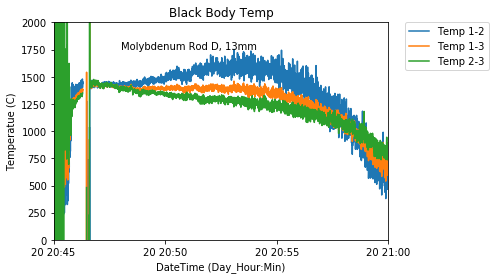

In [5]:
axes = plt.gca()
plt.title("Black Body Temp")
plt.ylabel("Temperatue (C)")
plt.xlabel("DateTime (Day_Hour:Min)")
axes.set_xlim([datetime.datetime(2017, 11, 20, 20, 45,0,0), datetime.datetime(2017,11,20,21,0,0,0)])
axes.set_ylim([0,2000])
string = "Molybdenum Rod D, 13mm"
axes.text(datetime.datetime(2017,11,20,20,48,0,0), 1750,string)
plt.plot(time,temp1, label = "Temp 1-2")
plt.plot(time, temp2, label = "Temp 1-3")
plt.plot(time, temp3, label = "Temp 2-3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##Create plot of black body temperatures. 
##Adjust the xlim in datetime format to focus on the time when the sample lights up

# Time dependent spectral analysis

In [6]:
Wavelength = molyspec.object("Wavelength", "NIR")
wavelength = Wavelength.data

##X axis for black body animation, wavelengths of NIR spectrum

In [7]:
length = moly.group_channels("NIR_MP1_Norm")

##defines the length of time for animation, should match spectime defined next

In [8]:
SpecTime = moly.object("NIR_MP1_Raw", "Time")
spectime=SpecTime.data
array = np.zeros_like(spectime)
for i, item in enumerate(length):
    channelname = length[i].channel
    DATA = moly.object("NIR_MP1_Norm",channelname)
    data = DATA.data
    array[i] = data
    
##builds data array for animation
##Note: double check location of "Time" defined here as spectime (spectrometer time)

In [9]:
newarray = array[1000:]
newspectime = spectime[1000:]

##Used to trim data, typically initial data is taken for spectrometer calibration purposes, etc.
##Actual time of redhot can be found using next cell, via trial and error
##This step can be skipped, but will make run time longer when creating animation

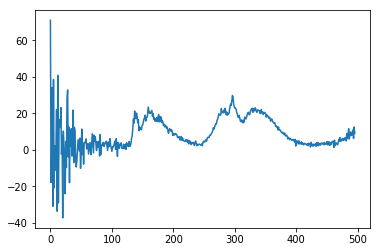

In [10]:
plt.plot(array[1000])

In [11]:
countmax = np.max([np.nanmax(frame) for frame in array])

##Finds max value of counts for spectrometer, to adjust ymax in next cell

In [12]:
def animate(i):
    ax.clear()
    plt.ylabel('Intensity (counts)')
    plt.xlabel('Wavelength')
    ax.set_ylim(-30,countmax+250)
    string = newspectime[i].strftime("%Y/%m/%d %H:%M:%S.%f")
    ax.text(1600, countmax+150, string)
    plot = plt.plot(wavelength, newarray[i])
    return plot

##Animate function is used by ffmpeg to create each frame, ax.text may need to be adjusted depending on range of counts

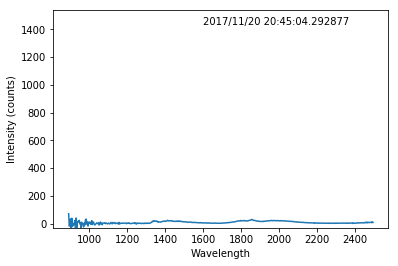

In [13]:
fig = plt.figure()
ax = plt.axes()



anim = animation.FuncAnimation(fig, animate, frames=len(newspectime), blit=False)
mywriter = animation.FFMpegWriter(fps=20)

anim.save("NIRVideo2.mp4", writer=mywriter)

##Creates animation, expect long runtime

In [11]:
SampTemp = molysens.object("Untitled", "T- Sample")
samptemp = SampTemp.data
SampTime = molysens.object("Untitled", "Time")
samptime = SampTime.data

##Get data for sample holder temperature

TypeError: must be real number, not datetime.datetime

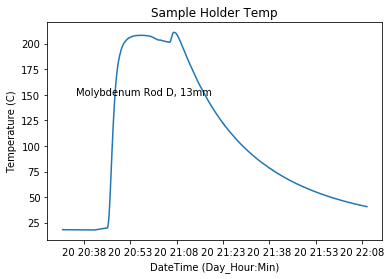

In [12]:
axes=plt.gca()
plt.title("Sample Holder Temp")
plt.ylabel("Temperature (C)")
plt.xlabel("DateTime (Day_Hour:Min)")
plt.plot(samptime, samptemp )
string = "Molybdenum Rod D, 13mm"
axes.text(time[1000], 150,string)

##Plot sample holder temperature vs time

The following cells are for comparisons, e.g. black body vs sample holder temperatures, sample holder temperature differences from different runs, etc.

# UNDER CONSTRUCTION

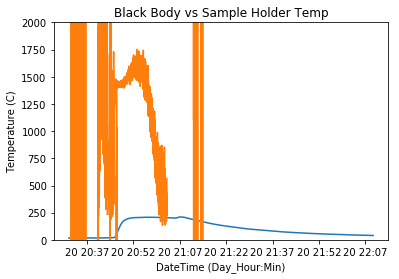

In [19]:
plt.title("Black Body vs Sample Holder Temp")
plt.ylabel("Temperature (C)")
plt.xlabel("DateTime (Day_Hour:Min)")
axes = plt.gca()
axes.set_ylim([0,2000])
plt.plot(samptime, samptemp )
plt.plot(time, temp1)


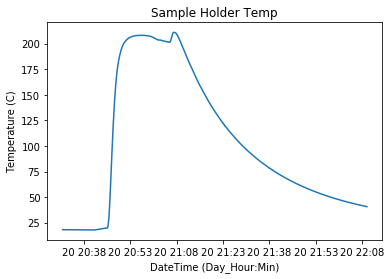

In [22]:
moly2 = TF("C:\\Users\\bowenm\\Documents\\Untitled Folder\\Moly1\\111717\\Run1_Sensors.tdms")

In [23]:
SampTemp2 = moly2.object("Untitled","T- Sample")

In [24]:
samptemp2=SampTemp2.data

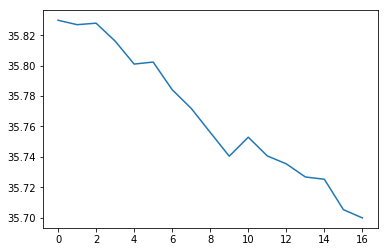

In [26]:
plt.plot(samptemp2)

In [27]:
"hello"+"world"

'helloworld'